# MeerKAT conversion guide

In [13]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as e:
    print(e)
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")

XRADIO version 0.0.41 already installed.


## Download dataset

In [14]:
import toolviper

toolviper.utils.data.download(file="small_meerkat.ms")

[2024-10-14 16:02:18,269]  WARNING   toolviper:  File exists: /home/fedemp/ws_xradio_dev/venv_xradio_python312/lib/python3.12/site-packages/toolviper/utils/data/.dropbox 
[2024-10-14 16:02:18,273]     INFO   toolviper:  Updating file metadata information ...  
 

 Download List     
 ────────────────── 
  small_meerkat.ms

small_meerkat.ms.zip:   0%|          | 0.00/2.28M [00:00<?, ?iB/s]

## Convert to Processing Set

In [15]:
from xradio.measurement_set import convert_msv2_to_processing_set

ms_file = "small_meerkat.ms"
main_chunksize = {"frequency": 1, "time": 20}  # baseline, polarization
outfile = "small_meerkat.vis.zarr"
convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=outfile,
    parallel=False,
    overwrite=True,
    main_chunksize=main_chunksize,
)

[2024-10-14 16:02:22,350]     INFO   toolviper:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBS_MODE', 'OBSERVATION_ID', 'FIELD_ID'] 
[2024-10-14 16:02:22,480]     INFO   toolviper:  Number of partitions: 3 
[2024-10-14 16:02:22,483]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [1], FIELD [0], SCAN [1] 
with_pointing True
[2024-10-14 16:02:22,954]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [2], FIELD [1], SCAN [2 4 6] 
with_pointing True
[2024-10-14 16:02:23,245]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [3], FIELD [2], SCAN [3 5] 
with_pointing True


## Processing Set

In [16]:
from xradio.measurement_set import open_processing_set

ps = open_processing_set(ps_store=outfile)
ps.summary()

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,small_meerkat_0,"[CALIBRATE_BANDPASS, CALIBRATE_FLUX]","(74, 6, 50, 4)","[XX, XY, YX, YY]",[1],spw_0,[J1939-6342_0],[J1939-6342_0],[],"[fk5, 19h39m25.03s, -63d42m45.60s]",3.265869e+09,3.276337e+09
2,small_meerkat_1,"[CALIBRATE_PHASE, CALIBRATE_AMPLI]","(42, 6, 50, 4)","[XX, XY, YX, YY]","[2, 4, 6]",spw_0,[J1619-8418_1],[J1619-8418_1],[],"[fk5, 16h19m33.97s, -84d18m19.10s]",3.265869e+09,3.276337e+09
1,small_meerkat_2,[TARGET],"(223, 6, 50, 4)","[XX, XY, YX, YY]","[3, 5]",spw_0,[J0358-8103_2],[J0358-8103_2],[],"[fk5, 3h58m31.50s, -81d03m45.70s]",3.265869e+09,3.276337e+09


In [17]:
ms0 = ps.get(0)
ms0

<xarray.MeasurementSetXds> Size: 1MB
Dimensions:                     (baseline_id: 6, time: 74, frequency: 50,
                                 polarization: 4, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U4 96B dask.array<chunksize=(6,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U4 96B dask.array<chunksize=(6,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 48B 0 1 2 3 4 5
    scan_number                 (time) int64 592B dask.array<chunksize=(74,), meta=np.ndarray>
  * time                        (time) float64 592B 1.7e+09 1.7e+09 ... 1.7e+09
  * frequency                   (frequency) float64 400B 3.266e+09 ... 3.276e+09
  * polarization                (polarization) <U2 32B 'XX' 'XY' 'YX' 'YY'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 4kB dask.array<chunksize=(20, 6), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 89kB dask.array<chunksize=(20, 6, 1, 4), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 4kB dask.array<chunksize=(20, 6), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 11kB dask.array<chunksize=(20, 6, 3), meta=np.ndarray>
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 710kB dask.array<chunksize=(20, 6, 1, 4), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 355kB dask.array<chunksize=(20, 6, 1, 4), meta=np.ndarray>
Attributes:
    creation_date:     2024-10-14T14:02:22.635003
    data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'flag': 'FL...
    observation_info:  {'observer': ['Kim McAlpine'], 'project': '20231115-00...
    partition_info:    {'field_name': ['J1939-6342_0'], 'intents': ['CALIBRAT...
    processor_info:    {'sub_type': '', 'type': ''}
    schema_version:    4.0.-9994
    type:              visibility
    xradio_version:    0.0.41
    antenna_xds:       <xarray.Dataset> Size: 472B\nDimensions:              ...

In [18]:
ms0.VISIBILITY.attrs["field_and_source_xds"]

<xarray.Dataset> Size: 152B
Dimensions:             (sky_dir_label: 2)
Coordinates:
    field_name          <U12 48B ...
  * sky_dir_label       (sky_dir_label) <U3 24B 'ra' 'dec'
    source_name         <U12 48B ...
Data variables:
    FIELD_PHASE_CENTER  (sky_dir_label) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    SOURCE_LOCATION     (sky_dir_label) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
Attributes:
    is_ephemeris:  False
    type:          field_and_source

In [19]:
ms0.attrs["antenna_xds"]

<xarray.Dataset> Size: 472B
Dimensions:                 (antenna_name: 3, cartesian_pos_label: 3,
                             receptor_label: 2)
Coordinates:
  * antenna_name            (antenna_name) <U4 48B 'm000' 'm002' 'm063'
  * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    mount                   (antenna_name) <U6 72B dask.array<chunksize=(3,), meta=np.ndarray>
    polarization_type       (antenna_name, receptor_label) <U1 24B dask.array<chunksize=(3, 2), meta=np.ndarray>
  * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
    station                 (antenna_name) <U4 48B dask.array<chunksize=(3,), meta=np.ndarray>
    telescope_name          (antenna_name) <U7 84B dask.array<chunksize=(3,), meta=np.ndarray>
Data variables:
    ANTENNA_DISH_DIAMETER   (antenna_name) float64 24B dask.array<chunksize=(3,), meta=np.ndarray>
    ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 72B dask.array<chunksize=(3, 3), meta=np.ndarray>
    ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 48B dask.array<chunksize=(3, 2), meta=np.ndarray>
Attributes:
    overall_telescope_name:  MeerKAT
    relocatable_antennas:    False
    type:                    antenna

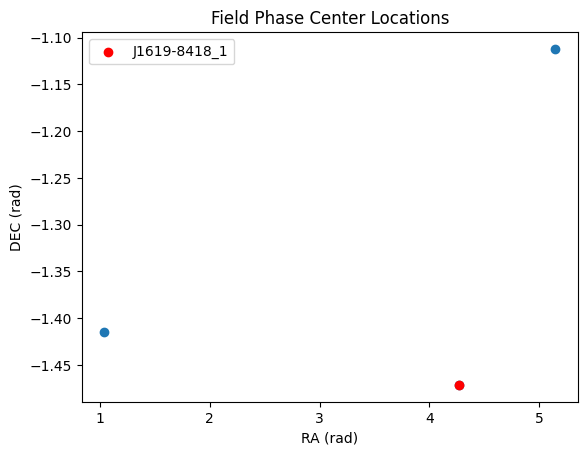

In [20]:
ps.plot_phase_centers()

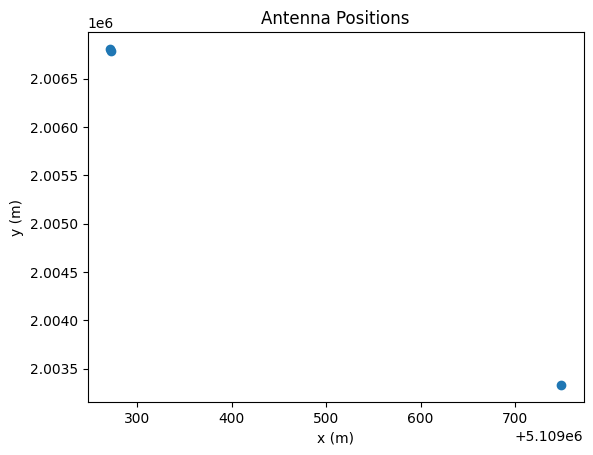

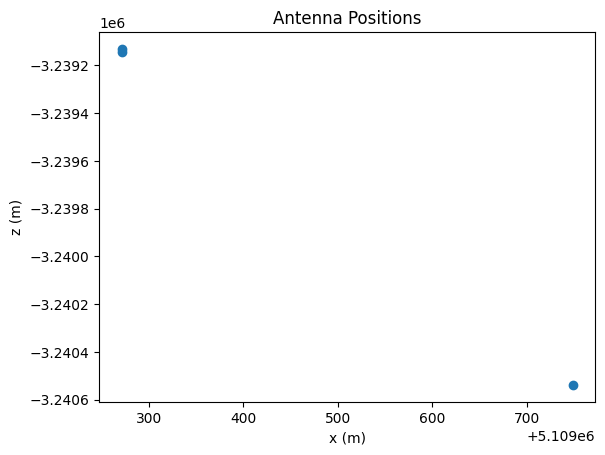

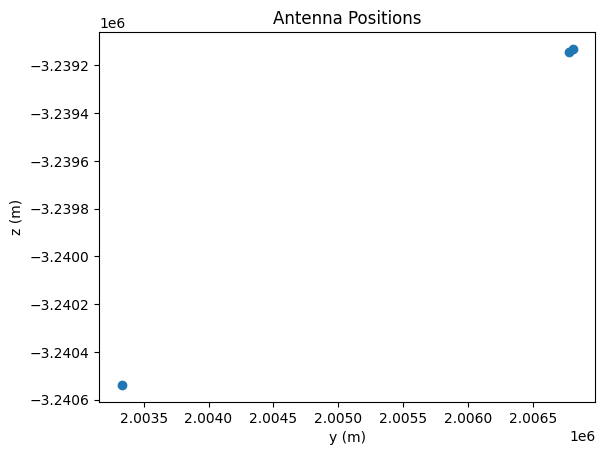

In [21]:
ps.plot_antenna_positions()